In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import requests,zipfile, io
import seaborn as sns

In [2]:
bank = pd.read_csv('./비지도학습/bank-full.csv', sep=';')

bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [3]:
bank_col_list = ['job', 'marital', 'education', 'default', 'housing', 'loan']
for col_name in bank_col_list:
    print('================== ' + col_name + ' ==================')
    print(bank.groupby([col_name, 'y'])['y'].count(). unstack() / bank.groupby(['y'])['y'].count()*100)

================== job ==================
y                     no        yes
job                                
admin.         11.372176  11.930422
blue-collar    22.604078  13.386273
entrepreneur    3.416662   2.325581
housemaid       2.833024   2.060881
management     20.432343  24.598223
retired         4.378538   9.756098
self-employed   3.486799   3.535640
services        9.480988   6.976744
student         1.675768   5.086028
technician     16.925505  15.882019
unemployed      2.757878   3.819247
unknown         0.636241   0.642844
================== marital ==================
y                no        yes
marital                       
divorced  11.484896  11.760257
married   61.266971  52.089242
single    27.248134  36.150501
================== education ==================
y                 no        yes
education                      
primary    15.680577  11.174135
secondary  51.981364  46.322556
tertiary   28.317720  37.738703
unknown     4.020340   4.764606
=============

In [4]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

bank_dummy = pd.get_dummies(bank[['job', 'marital', 'education', 'default', 'housing', 'loan']])
bank_dummy['flg'] = bank['y'].map(lambda x: 1 if x == 'yes' else 0)

X = pd.concat([bank_dummy.drop('flg', axis=1), bank[['age','balance', 'campaign']]], axis=1)
Y = bank_dummy['flg']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify= Y, random_state=12)

for model in [LogisticRegression(), LinearSVC(), DecisionTreeClassifier(),
                         KNeighborsClassifier(n_neighbors=5), RandomForestClassifier()]:
    
    fit_model = model.fit(X_train, Y_train)
    Y_pred = fit_model.predict(X_test)
    confusion_M = confusion_matrix(Y_test, Y_pred)
    
    print('Train : ', fit_model.__class__.__name__, fit_model.score(X_train, Y_train))
    print('Test : ',fit_model.__class__.__name__, fit_model.score(X_test, Y_test))
    print('Confusion matrix:\n{}'.format(confusion_M))
    print('정밀도 : %.3f' % precision_score(y_true=Y_test, y_pred=Y_pred))
    print('재현도 : %.3f' % recall_score(y_true=Y_test, y_pred = Y_pred))
    print('F1 값 : %.3f' % f1_score(y_true=Y_test, y_pred=Y_pred))

/home/sqeng/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train :  LogisticRegression 0.8828889937477882
Test :  LogisticRegression 0.8830399009112625
Confusion matrix:
[[9980    1]
 [1321    1]]
정밀도 : 0.500
재현도 : 0.001
F1 값 : 0.002


/home/sqeng/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Train :  LinearSVC 0.882977468444025
Test :  LinearSVC 0.883128372998319
Confusion matrix:
[[9981    0]
 [1321    1]]
정밀도 : 1.000
재현도 : 0.001
F1 값 : 0.002
Train :  DecisionTreeClassifier 0.9948979591836735
Test :  DecisionTreeClassifier 0.8142970892683359
Confusion matrix:
[[8833 1148]
 [ 951  371]]
정밀도 : 0.244
재현도 : 0.281
F1 값 : 0.261
Train :  KNeighborsClassifier 0.8980771499351186
Test :  KNeighborsClassifier 0.8689728390692737
Confusion matrix:
[[9689  292]
 [1189  133]]
정밀도 : 0.313
재현도 : 0.101
F1 값 : 0.152
Train :  RandomForestClassifier 0.994750501356612
Test :  RandomForestClassifier 0.8735733875962134
Confusion matrix:
[[9642  339]
 [1090  232]]
정밀도 : 0.406
재현도 : 0.175
F1 값 : 0.245


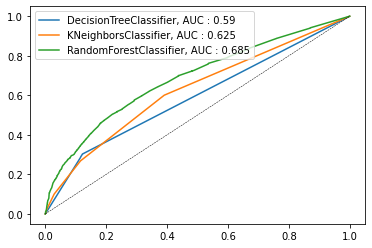

In [9]:
from sklearn.metrics import roc_curve,roc_auc_score
for model in [DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors=5), RandomForestClassifier()]:
    fit_model = model.fit(X_train, Y_train)
    method = fit_model.__class__.__name__
    fpr, tpr, thresholds = roc_curve(Y_test, fit_model.predict_proba(X_test)[:,1])
    auc = roc_auc_score(Y_test, fit_model.predict_proba(X_test)[:,1])
    
    plt.plot(fpr, tpr, label = method+', AUC : ' + str(round(auc,3)))
    plt.legend(loc=2)
    
plt.plot([0, 1], [0, 1], color='black', lw=0.5, linestyle='--')